In [28]:
import numpy as np

In [29]:
from sklearn import datasets

In [30]:
X,y = datasets.load_wine(return_X_y=True, as_frame=False)

In [31]:
X.shape, y.shape

((178, 13), (178,))

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [33]:
X2 = PCA(n_components=2).fit_transform(X)
X2.shape

(178, 2)

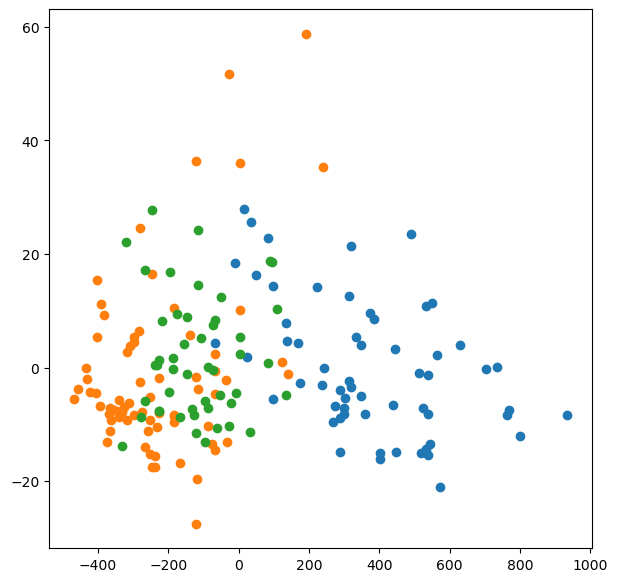

In [34]:
fig,ax = plt.subplots(figsize=(7,7))
for c in sorted(set(y)):
    ax.scatter(X2[y==c,0],X2[y==c,1])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42)

In [38]:
X_train.shape, X_test.shape

((160, 13), (18, 13))

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
  ).fit(X_train,y_train)

In [41]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'p':[1,2]
}

In [65]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [66]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [67]:
best_model = grid_search.best_estimator_

In [68]:
from sklearn.metrics import classification_report

In [69]:
y_pred = best_model.predict(X_test)

In [70]:
print(classification_report(
    y_true=y_test,
    y_pred=y_pred,
))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.86      0.92         7
           2       0.57      1.00      0.73         4

    accuracy                           0.83        18
   macro avg       0.86      0.86      0.83        18
weighted avg       0.90      0.83      0.84        18



In [78]:
from sklearn.datasets import load_wine

In [79]:
wine = load_wine()

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

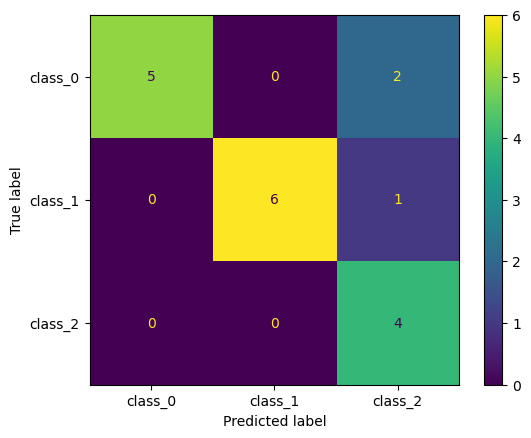

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=wine.target_names)